#### IMPORT

In [1]:
import os, platform

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from matplotlib import pyplot


from keras.utils.np_utils import to_categorical 
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, \
    BatchNormalization, Flatten, LSTM
# from scikeras.wrappers import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import load_model

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc


from sklearn.metrics import roc_curve, auc

from itertools import cycle
from scipy import interp
from scipy.optimize import brentq
from scipy.interpolate import interp1d

#### PARAMETERS
- Set the condition
> * N_FEATURES: Number of Features
> * CHECK_BLANKS: Check for blank data. If any blank data is found, the whole row of data will be deleted.
> * CHECK_CLASS_IMBALANCE: Check for dataset class imbalance. The more balance the dataset, the less biases the model will be.

In [2]:
##############################
# # deep learning features # #
##############################
SEED = 1005 # random seed for reproducibility

# should make this dynamic
N_FEATURES = 6 #37 #98 #190 #61 #37 #46
# N_CLASSES= 9
TIMESTEPS = 1
EPOCH=200
BATCH_SIZE=200

###############
# # dataset # #
###############
DATASET_DIR_NAME = "dataset"
SAMPLE_DATASET_NAME = "five_train" + ".csv"
ACTUAL_DATASET_NAME = "five_test_fixed" + ".csv"

# SAMPLE_DATASET_NAME = "train_m2m_tengraph" + ".csv"
# ACTUAL_DATASET_NAME = "test_m2m_tengraph" + ".csv"

# SAMPLE_DATASET_NAME = "andy" + ".csv"
# ACTUAL_DATASET_NAME = "andy" + ".csv"

MODEL_DIR_NAME = "model"
MODEL_NAME = "classifier" + ".h5"

DATASET_DIR_PATH = os.path.join(os.getcwd(), DATASET_DIR_NAME)
SAMPLE_DATASET_PATH = os.path.join(DATASET_DIR_PATH, SAMPLE_DATASET_NAME)
ACTUAL_DATASET_PATH = os.path.join(DATASET_DIR_PATH, ACTUAL_DATASET_NAME)

MODEL_DIR_PATH = os.path.join(os.getcwd(), MODEL_DIR_NAME)
MODEL_PATH = os.path.join(MODEL_DIR_PATH, MODEL_NAME)

CLASSES_COL_NAME = "Subject"
CLASSES_COL_NUM = 0
FEATURES_COL_NUM = 6 #4
CLASS_LIST = ['adhy', 'alan', 'andy', 'bryce', 'chris', 'cy', 'gerald', 'jc', 'jonah', 'qk']
# CLASS_LIST = ['andy', 'azfar', 'gerald', 'jonah', 'ys']

#################
# # sns theme # #
#################
# sns.set_theme(style="darkgrid") # (dark background with white gridlines)
sns.set_theme(style="whitegrid") # (white background with grey gridlines)
# sns.set_theme(style="dark") # (dark background with no gridlines)
# sns.set_theme(style="white") # (white background with no gridlines)
# sns.set_theme(style="ticks") # (white background with axis ticks and no gridlines)

def df_drop(df):
    # df.drop(df[df['Subject']=='andy'].index, inplace=True)
    # df.drop(df[df['Subject']=='azfar'].index, inplace=True)
    df.drop(df[df['Subject']=='ch'].index, inplace=True)
    # df.drop(df[df['Subject']=='cy'].index, inplace=True)
    df.drop(df[df['Subject']=='gerald'].index, inplace=True)
    df.drop(df[df['Subject']=='jc'].index, inplace=True)
    df.drop(df[df['Subject']=='jonah'].index, inplace=True)
    df.drop(df[df['Subject']=='qikai'].index, inplace=True)
    df.drop(df[df['Subject']=='ys'].index, inplace=True)
    df.drop(df[df['Subject']=='zen'].index, inplace=True)
    
    return df

In [3]:
if os.path.isdir(DATASET_DIR_PATH) is True:
    print(f"Dataset directory exists at: {DATASET_DIR_PATH}")
    pass
else:
    try:
        os.mkdir(DATASET_DIR_PATH, 666)
        print(f"Dataset directory have been created at: {DATASET_DIR_PATH}")
    except:
        print("Error: Dataset Directory not created")
        
if os.path.isdir(MODEL_DIR_PATH) is True:
    print(f"Model directory exists at: {MODEL_DIR_PATH}")
    pass
else:
    try:
        os.mkdir(MODEL_DIR_PATH, 666)
        print(f"Model directory have been created at: {MODEL_DIR_PATH}")
    except:
        print("Error: Model Directory not created")

Dataset directory exists at: C:\Users\spencer\Documents\Github\deep-captcha\dataset
Model directory exists at: C:\Users\spencer\Documents\Github\deep-captcha\model


#### CREATE MODEL
- Create base model
- Wrap it with KerasClassifier

In [4]:
# create base model
def create_base_model():
    model = Sequential()
#     model.add(LSTM(units=128, return_sequences=True, 
#                  input_shape=(TIMESTEPS,N_FEATURES)))
#     model.add(Dropout(0.2))
#     model.add(BatchNormalization())
    model.add(LSTM(units=1024, return_sequences=True,
             input_shape=(TIMESTEPS,N_FEATURES)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=512, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=256, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=128, return_sequences=True))
    model.add(BatchNormalization())
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    # softmax for multi-class classification
    model.add(Flatten())
    print(n_classes)
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    return model

# wrap model in KerasClassifier
def create_model():
    model = KerasClassifier(build_fn=create_base_model, epochs=EPOCH, 
                            batch_size=BATCH_SIZE)
    return model



In [5]:
# divide data into features X and target (classes) Y
def prepare_dataset(df):
    X = df.values[:,FEATURES_COL_NUM:].astype(float)
    Y = df.values[:,CLASSES_COL_NUM].astype(str)

    # convert target Y to labelbinarizer Y for model
    # fit_transform is not used to reuse lb
    Y = Y.reshape(-1, 1)
    lb = LabelBinarizer().fit(Y)
    Y = lb.transform(Y)


    #################################
    # # get all the encoded class # #
    #################################
    print("LabelBinarizer is able to decipher: ")
    print(lb.classes_)
    print("\n")

    ###########################
    # # print X and Y shape # #
    ###########################
    print(f"X | Features | Dataset Shape: {X.shape}")
    print(f"Y | Classes  | Dataset Shape: {Y.shape}")

    return X, Y, lb

In [6]:
def split_shape_dataset(X, Y, SPLIT_RATIO, TIMESTEPS, SEED):

    ##############################################################
    # # split dataset into train and test set of 0.8/0.2 ratio # #
    ##############################################################
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=SPLIT_RATIO, random_state=SEED)

    ############################
    # # reshaping of dataset # #
    ############################

    # reshaping the dataset to include LSTM Timesteps
    print(X_train.dtype)
    X_train = np.asarray(X_train, dtype=np.float32)
    print(X_train.dtype)
    X_train = np.reshape(X_train, (X_train.shape[0], TIMESTEPS, X_train.shape[1]))
    print(X_test.dtype)
    X_test = np.asarray(X_test, dtype=np.float32)
    print(X_test.dtype)
    X_test = np.reshape(X_test, (X_test.shape[0], TIMESTEPS, X_test.shape[1]))

    # retrieve number of classes
    n_classes = y_train.shape[1]

    print(f"X train shape: {X_train.shape}")
    print(f"Y train shape: {y_train.shape}")
    print(f"X test shape: {X_test.shape}")
    print(f"Y test shape: {y_test.shape}")
    print(f"Number of Classes: {n_classes}")

    return X_train, X_test, y_train, y_test, n_classes

def reshape_dataset(X, TIMESTEPS):
    # reshaping the dataset to include LSTM Timesteps
    X = np.asarray(X, dtype=np.float32)
    X = np.reshape(X, (X.shape[0], TIMESTEPS, X.shape[1]))
    return X


#### CHECK DATASET

In [7]:
#     sns.catplot(x="Subject", y="D|0", data=df)

    
#     sns.catplot(x="Subject", y="D|1", hue="D|1", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|3", hue="D|3", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|4", hue="D|4", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|5", hue="D|5", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|6", hue="D|6", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|7", hue="D|7", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|8", hue="D|8", data=df, legend=False)

#     sns.catplot(x="Subject", y="D|1", hue="D|1", data=df, legend=False)
#     sns.catplot(x="Subject", y="I|1+2", hue="I|1+2", data=df, legend=False)
#     sns.catplot(x="Subject", y="PF|1+2", hue="PF|1+2", data=df, legend=False)
#     sns.catplot(x="Subject", y="RF|1+2", hue="RF|1+2", data=df, legend=False)
#     sns.catplot(x="Subject", y="DT|1+2", hue="DT|1+2", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|9", hue="D|9", data=df, legend=False)


#     sns.catplot(x="Subject", y="TT|1+3", hue="TT|1+3", data=df, legend=False)
#     sns.catplot(x="Subject", y="QT|1+4", hue="QT|1+4", data=df, legend=False)

#### FIT AND SAVE MODEL
- Fitting of model
- Get Accuracy and Loss of Mdoel
- Saving Model

In [8]:
############################
# # reshaping of dataset # #
############################
# loading of dataset
df = pd.read_csv(SAMPLE_DATASET_PATH)
df.head()

# df = df_drop(df)
dataset = df.values

# divide data into features X and target (classes) Y
# convert target Y to labelbinarizer Y for model
X, Y, lb = prepare_dataset(df)

# reshaping the dataset to include LSTM Timesteps
X = reshape_dataset(X, TIMESTEPS)
n_classes = Y.shape[1]

#####################
# # fit the model # #
#####################

model = create_model()
es = EarlyStopping(monitor='loss', mode='min', min_delta=0.001, patience=50,
                   verbose=0)
history = model.fit(X, Y, callbacks=es)

LabelBinarizer is able to decipher: 
['adhy' 'alan' 'andy' 'bryce' 'chris' 'cy' 'gerald' 'jc' 'jonah' 'qk']


X | Features | Dataset Shape: (8280, 6)
Y | Classes  | Dataset Shape: (8280, 10)
10
Epoch 1/200
42/42 [==============================] - 54s 151ms/step - loss: 2.1094 - accuracy: 0.1978
Epoch 2/200
42/42 [==============================] - 6s 153ms/step - loss: 1.9651 - accuracy: 0.2527
Epoch 3/200
42/42 [==============================] - 6s 149ms/step - loss: 1.9375 - accuracy: 0.2595
Epoch 4/200
42/42 [==============================] - 6s 151ms/step - loss: 1.9190 - accuracy: 0.2653
Epoch 5/200
42/42 [==============================] - 6s 152ms/step - loss: 1.9078 - accuracy: 0.2694
Epoch 6/200
42/42 [==============================] - 6s 154ms/step - loss: 1.9030 - accuracy: 0.2699
Epoch 7/200
42/42 [==============================] - 6s 154ms/step - loss: 1.8917 - accuracy: 0.2716
Epoch 8/200
42/42 [==============================] - 6s 152ms/step - loss: 1.8911 - accuracy: 0.27

42/42 [==============================] - 6s 147ms/step - loss: 1.6993 - accuracy: 0.3534
Epoch 159/200
42/42 [==============================] - 6s 147ms/step - loss: 1.7018 - accuracy: 0.3595
Epoch 160/200
42/42 [==============================] - 6s 137ms/step - loss: 1.7003 - accuracy: 0.3621
Epoch 161/200
42/42 [==============================] - 6s 138ms/step - loss: 1.7041 - accuracy: 0.3600
Epoch 162/200
42/42 [==============================] - 6s 132ms/step - loss: 1.6999 - accuracy: 0.3577
Epoch 163/200
42/42 [==============================] - 6s 138ms/step - loss: 1.7075 - accuracy: 0.3513
Epoch 164/200
42/42 [==============================] - 6s 141ms/step - loss: 1.7057 - accuracy: 0.3559
Epoch 165/200
42/42 [==============================] - 6s 142ms/step - loss: 1.6914 - accuracy: 0.3618
Epoch 166/200
42/42 [==============================] - 6s 140ms/step - loss: 1.6990 - accuracy: 0.3664
Epoch 167/200
42/42 [==============================] - 6s 138ms/step - loss: 1.7080 - a

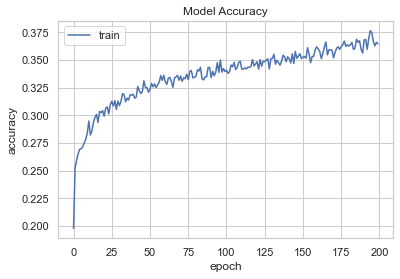

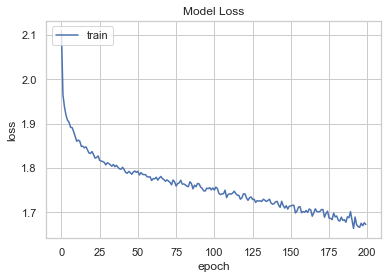

In [9]:
##########################
# # get model accuracy # #
##########################
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

######################
# # get model loss # #
######################
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### SAVE MODEL

In [10]:
##################
# # save model # #
##################
model.model.save(MODEL_PATH)

# LIVE TESTING
> Live test with new dataset to check if model function as it should

#### LOAD MODEL

In [11]:
##################
# # load model # #
##################

# model = create_model()
model = load_model(MODEL_PATH)

#### LOAD DATA
- Import new dataset to verify the model is able to predict accurately

In [12]:
# import unseen data
pred_df = pd.read_csv(ACTUAL_DATASET_PATH)
pred_df.head()
# pred_df = df_drop(pred_df)

,Subject,Char_Total_Str,Char_Total_Int,Char_Init,Char_End,Seq_No,Current_Dwell,Interval,Press_Flight,Release_Flight,Digraph,Later_Dwell
0,adhy,u_s,21_19,21,19,3,0.138573,-0.084819,0.053754,0.084257,0.222830,0.169076
1,adhy,s_e,19_5,19,5,3,0.169076,-0.100031,0.069045,0.093889,0.262965,0.193920
2,adhy,e_~,5_0,5,0,3,0.193920,-0.031251,0.162669,0.107062,0.300982,0.138313
3,adhy,~_v,0_22,0,22,3,0.138313,0.464183,0.602497,0.602466,0.740780,0.138283
4,adhy,v_o,22_15,22,15,3,0.138283,-0.084802,0.053481,-0.022194,0.116089,0.062608


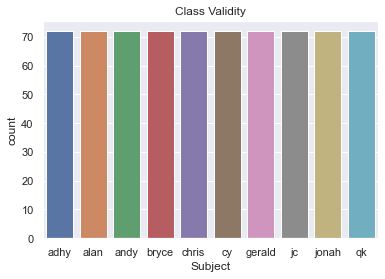

In [13]:
################################
# # check for class validity # #
################################
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Subject", data=pred_df).set_title("Class Validity")

# remove missing values if available
pred_df = pred_df.dropna()

In [21]:
pred_dataset = pred_df.values
results = pred_dataset[:,CLASSES_COL_NUM]

# # divide data into features X
# pred_row = pred_dataset[:,3:].astype(float)

########################
# # predict all rows # #
########################
pred_row=pred_df.iloc[:,FEATURES_COL_NUM:]

#################################
# # predict more than one row # #
#################################
num = 2
start = 0 + num * 9
end = 9 + num * 9
pred_row=pred_df.iloc[start:end,FEATURES_COL_NUM:]
print(pred_row)

############################
# # predict a single row # #
############################

# pred_row=pred_df.iloc[11:12,FEATURES_COL_NUM:]

##################
# # shape data # #
##################
pred_row = pred_row.values.tolist()
pred_arr = np.asarray(pred_row, dtype=np.float32)
pred_arr = np.reshape(pred_arr, (pred_arr.shape[0], TIMESTEPS, pred_arr.shape[1]))

Y = CLASS_LIST
print(Y)
Y = np.asarray(Y)
Y = Y.reshape(-1, 1)
lb = LabelBinarizer().fit(Y)
Y = lb.transform(Y)

    Current_Dwell  Interval  Press_Flight  Release_Flight   Digraph  \
18       0.084898 -0.015655      0.069243        0.115984  0.200882   
19       0.131639 -0.015518      0.116120        0.084795  0.216434   
20       0.100313  0.015729      0.116042        0.147283  0.247597   
21       0.131554 -0.031156      0.100398        0.116240  0.247794   
22       0.147396 -0.015732      0.131665        0.069137  0.216533   
23       0.084868  0.069270      0.154139        0.210027  0.294895   
24       0.140757 -0.024715      0.116042        0.107034  0.247790   
25       0.131748 -0.046809      0.084939        0.100429  0.232178   
26       0.147238 -0.046826      0.100413        0.037317  0.184555   

    Later_Dwell  
18     0.131639  
19     0.100313  
20     0.131554  
21     0.147396  
22     0.084868  
23     0.140757  
24     0.131748  
25     0.147238  
26     0.084142  
['adhy', 'alan', 'andy', 'bryce', 'chris', 'cy', 'gerald', 'jc', 'jonah', 'qk']


In [22]:
####################################
# # get prediction and its label # #
####################################

pred_proba = model.predict(pred_arr)

pred_proba = np.sum(pred_proba, axis=0)
pred_proba = np.reshape(pred_proba, (1, 10))

pred = lb.inverse_transform(pred_proba)
acc = np.max(pred_proba, axis=1)

pred_results = np.column_stack((pred, acc))
# pred_results = np.column_stack((results, pred_results))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# df = pd.DataFrame(data=pred_results, index=None, columns=['Results', 'Prediction', 'Accuracy'])
df = pd.DataFrame(data=pred_results, index=None, columns=['Prediction', 'Accuracy'])
print(df)

df.to_csv("results_five.csv")

  Prediction   Accuracy
0       andy  1.6267316
